In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import sys

from smyleutils import averaging_utils as avg
from smyleutils import qboplot_utils as qbo
from smyleutils import colorbar_utils as cbars
from smyleutils import bootstrap_utils as boot


In [2]:
plotpath="/glade/campaign/cgd/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/SUPP/"

### Read in the data

In [3]:
basepath="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"
high_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc')
low_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc')
era5_nov=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc')

high_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init02.nc')
low_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init02.nc')
era5_feb=xr.open_dataset(basepath+'Uzm_ERA5_day_init02.nc')

high_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init09.nc')
low_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init09.nc')
era5_sep=xr.open_dataset(basepath+'Uzm_ERA5_day_init09.nc')

### Select the first 6 months since that's what we have for the high top

In [4]:
startdate=high_nov.time.isel(time=0).values ; enddate=high_nov.time.isel(time=high_nov.time.size-1).values
high_nov = high_nov.sel(time=slice(startdate,enddate)).Uzm
low_nov = low_nov.sel(time=slice(startdate,enddate)).Uzm
era5_nov = era5_nov.sel(time=slice(startdate,enddate)).Uzm

startdate=high_sep.time.isel(time=0).values ; enddate=high_sep.time.isel(time=high_sep.time.size-1).values
high_sep = high_sep.sel(time=slice(startdate,enddate)).Uzm
low_sep = low_sep.sel(time=slice(startdate,enddate)).Uzm
era5_sep = era5_sep.sel(time=slice(startdate,enddate)).Uzm

startdate=high_feb.time.isel(time=0).values ; enddate=high_feb.time.isel(time=high_feb.time.size-1).values
high_feb = high_feb.sel(time=slice(startdate,enddate)).Uzm
low_feb = low_feb.sel(time=slice(startdate,enddate)).Uzm
era5_feb = era5_feb.sel(time=slice(startdate,enddate)).Uzm

### Get tropical averaged zonal mean wind

In [5]:
high_nov_tr = avg.cosweightlat(high_nov,-5,5).load()
low_nov_tr = avg.cosweightlat(low_nov,-5,5).load()
era5_nov_tr = avg.cosweightlat(era5_nov,-5,5).load()

high_sep_tr = avg.cosweightlat(high_sep,-5,5).load()
low_sep_tr = avg.cosweightlat(low_sep,-5,5).load()
era5_sep_tr = avg.cosweightlat(era5_sep,-5,5).load()

high_feb_tr = avg.cosweightlat(high_feb,-5,5).load()
low_feb_tr = avg.cosweightlat(low_feb,-5,5).load()
era5_feb_tr = avg.cosweightlat(era5_feb,-5,5).load()

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


### Interpolate the model data from the pressure levels of the CAM TEM diagnostics onto the ERA5 pressure levels

In [6]:
high_nov_tr_interp = high_nov_tr.interp(ilev=era5_nov.level)
low_nov_tr_interp = low_nov_tr.interp(ilev=era5_nov.level)

high_sep_tr_interp = high_sep_tr.interp(ilev=era5_nov.level)
low_sep_tr_interp = low_sep_tr.interp(ilev=era5_nov.level)

high_feb_tr_interp = high_feb_tr.interp(ilev=era5_nov.level)
low_feb_tr_interp = low_feb_tr.interp(ilev=era5_nov.level)

### Calculate the ensemble mean

In [7]:
high_nov_tr_interpm = high_nov_tr_interp.mean('M')
low_nov_tr_interpm = low_nov_tr_interp.mean('M')

high_sep_tr_interpm = high_sep_tr_interp.mean('M')
low_sep_tr_interpm = low_sep_tr_interp.mean('M')

high_feb_tr_interpm = high_feb_tr_interp.mean('M')
low_feb_tr_interpm = low_feb_tr_interp.mean('M')

### Calculate the lead dependent climatology

In [8]:
era5_nov_tr_clim = era5_nov_tr.mean('init_year')
high_nov_tr_interpm_clim = high_nov_tr_interpm.mean('init_year')
low_nov_tr_interpm_clim = low_nov_tr_interpm.mean('init_year')

era5_sep_tr_clim = era5_sep_tr.mean('init_year')
high_sep_tr_interpm_clim = high_sep_tr_interpm.mean('init_year')
low_sep_tr_interpm_clim = low_sep_tr_interpm.mean('init_year')

era5_feb_tr_clim = era5_feb_tr.mean('init_year')
high_feb_tr_interpm_clim = high_feb_tr_interpm.mean('init_year')
low_feb_tr_interpm_clim = low_feb_tr_interpm.mean('init_year')

### Subtract the lead dependent climatology from ERA5 and the SMYLE ensemble mean and the SMYLE individual members

In [9]:
era5_nov_tr = era5_nov_tr - era5_nov_tr_clim
high_nov_tr_interp = high_nov_tr_interp - high_nov_tr_interpm_clim
low_nov_tr_interp = low_nov_tr_interp - low_nov_tr_interpm_clim
high_nov_tr_interpm = high_nov_tr_interpm - high_nov_tr_interpm_clim
low_nov_tr_interpm = low_nov_tr_interpm - low_nov_tr_interpm_clim

era5_sep_tr = era5_sep_tr - era5_sep_tr_clim
high_sep_tr_interp = high_sep_tr_interp - high_sep_tr_interpm_clim
low_sep_tr_interp = low_sep_tr_interp - low_sep_tr_interpm_clim
high_sep_tr_interpm = high_sep_tr_interpm - high_sep_tr_interpm_clim
low_sep_tr_interpm = low_sep_tr_interpm - low_sep_tr_interpm_clim

era5_feb_tr = era5_feb_tr - era5_feb_tr_clim
high_feb_tr_interp = high_feb_tr_interp - high_feb_tr_interpm_clim
low_feb_tr_interp = low_feb_tr_interp - low_feb_tr_interpm_clim
high_feb_tr_interpm = high_feb_tr_interpm - high_feb_tr_interpm_clim
low_feb_tr_interpm = low_feb_tr_interpm - low_feb_tr_interpm_clim

### Mean squared skill score calculation

In [10]:
def calcmsss(mod,obs,dim='init_year'):
    mse_mod = (1./mod[dim].size)*((mod - obs)**2).sum('init_year')
    mse_obs = (1./mod[dim].size)*(obs**2).sum('init_year')
    msss = 1 - (mse_mod / mse_obs)
    
    # dealing with the levels where low top doesn't have any data
    msss = msss.where( msss != 1, nan)
    return msss

In [11]:
msss_high_nov = calcmsss(high_nov_tr_interpm, era5_nov_tr)
msss_low_nov = calcmsss(low_nov_tr_interpm, era5_nov_tr)

msss_high_sep = calcmsss(high_sep_tr_interpm, era5_sep_tr)
msss_low_sep = calcmsss(low_sep_tr_interpm, era5_sep_tr)

msss_high_feb = calcmsss(high_feb_tr_interpm, era5_feb_tr)
msss_low_feb = calcmsss(low_feb_tr_interpm, era5_feb_tr)

### Anomaly correlation coefficient

In [12]:
acc_high_nov = xr.corr(era5_nov_tr, high_nov_tr_interpm, dim='init_year')
acc_low_nov = xr.corr(era5_nov_tr, low_nov_tr_interpm, dim='init_year')

acc_high_sep = xr.corr(era5_sep_tr, high_sep_tr_interpm, dim='init_year')
acc_low_sep = xr.corr(era5_sep_tr, low_sep_tr_interpm, dim='init_year')

acc_high_feb = xr.corr(era5_feb_tr, high_feb_tr_interpm, dim='init_year')
acc_low_feb = xr.corr(era5_feb_tr, low_feb_tr_interpm, dim='init_year')

### Read in bootstrapped confidence intervals (calculated at ./DATA_SORT/SIGNIF/fig1/output_signif_fig1_timepre.py

In [14]:
basepath_signif="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig1_2/"
signifdat_nov = xr.open_dataset(basepath_signif+"ci_pretime_initmon11.nc")
signifdat_sep = xr.open_dataset(basepath_signif+"ci_pretime_initmon09.nc")
signifdat_feb = xr.open_dataset(basepath_signif+"ci_pretime_initmon02.nc")

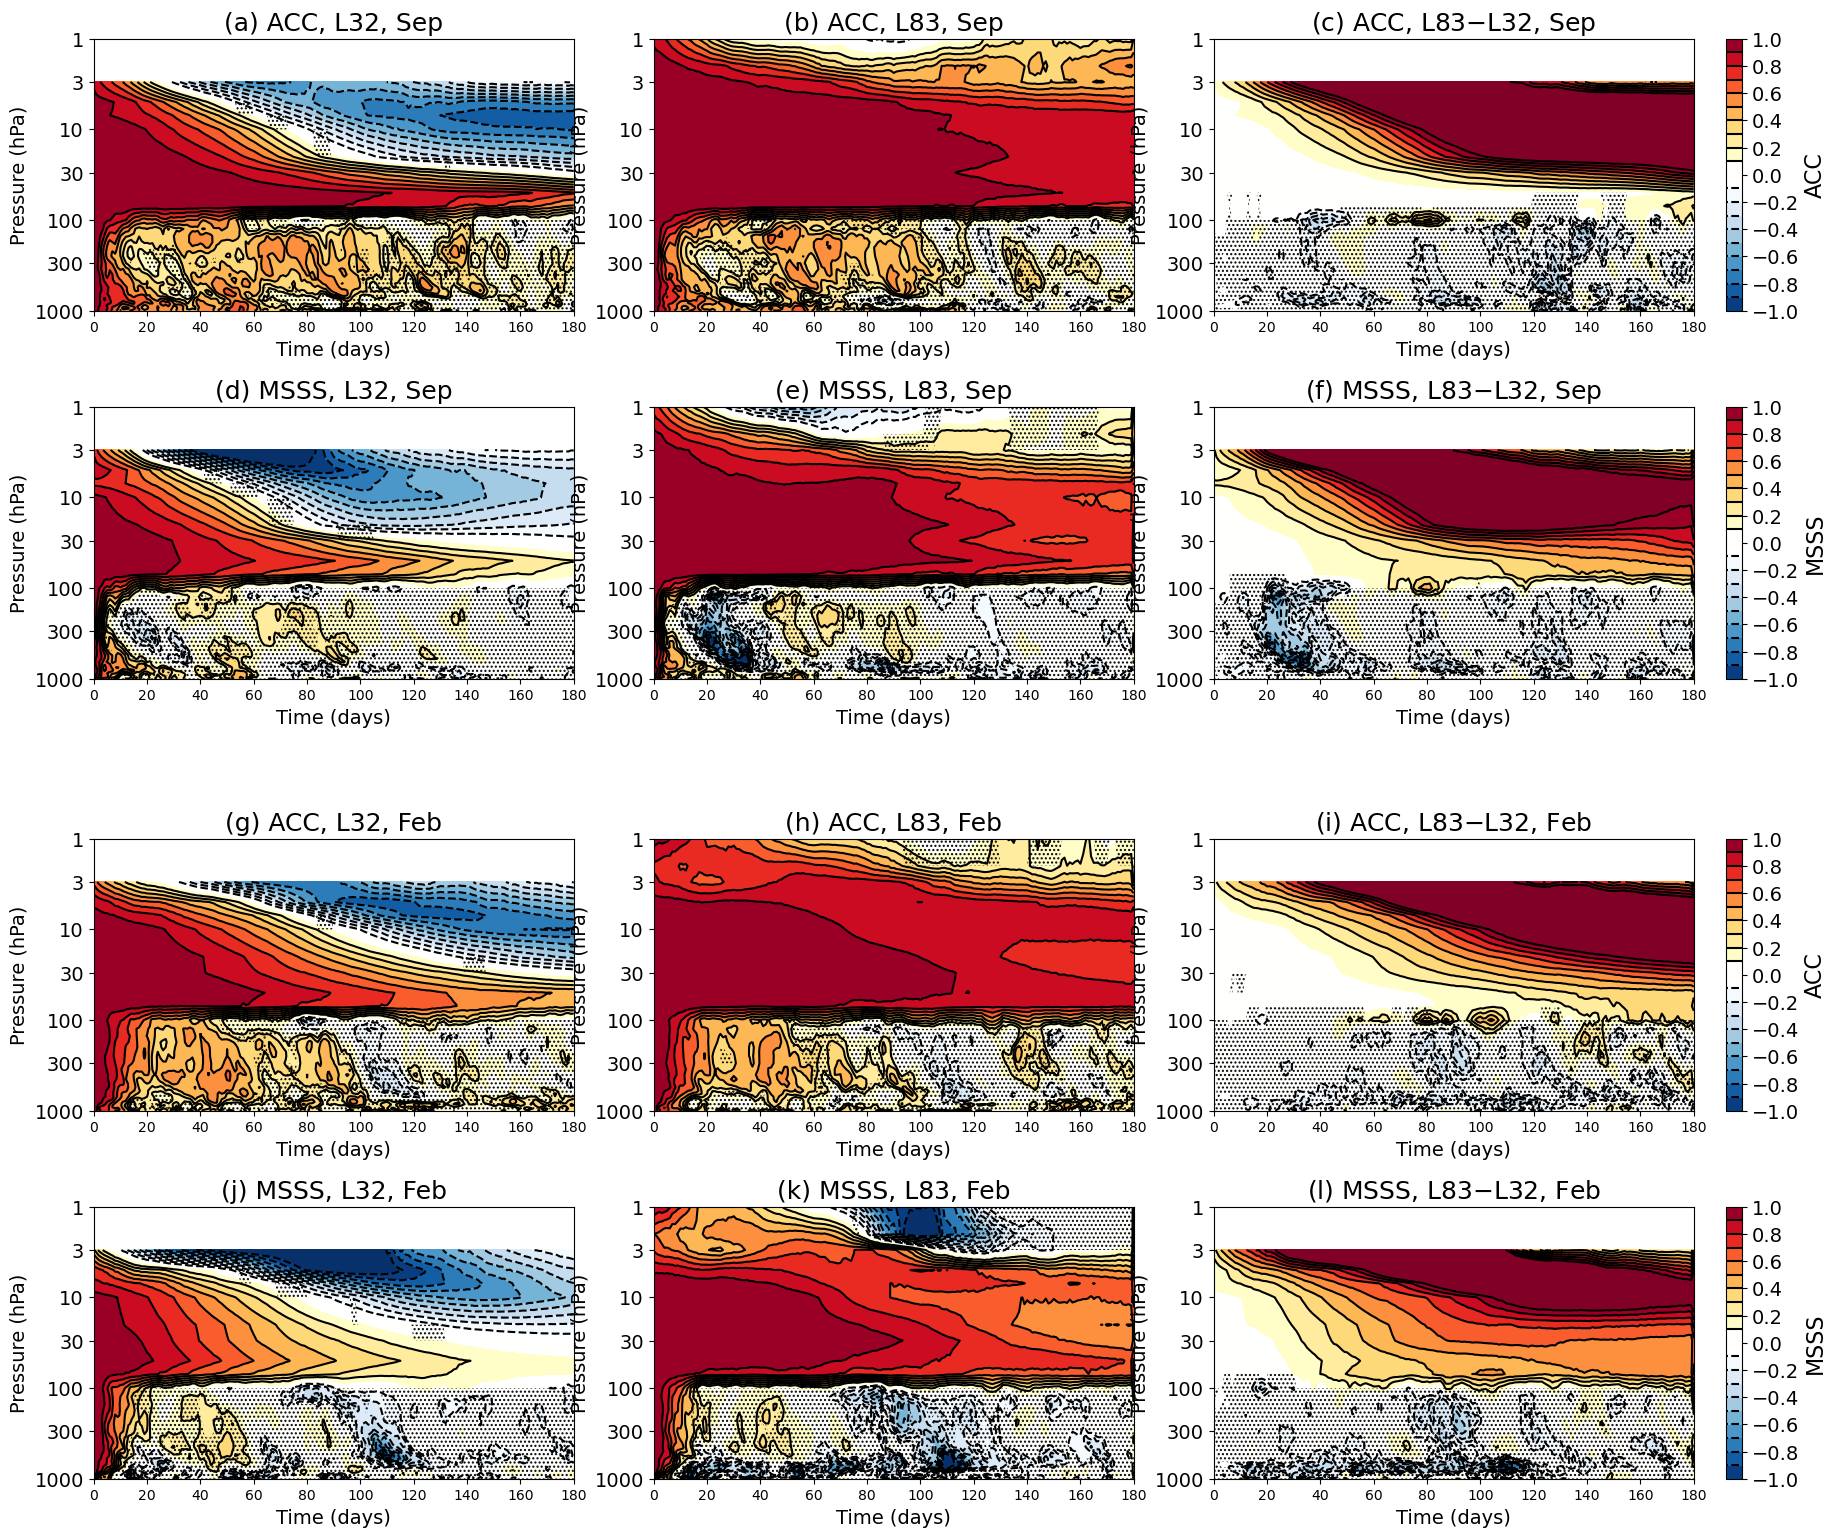

In [15]:
fig = plt.figure(figsize=(16,16))

signifdat = xr.DataArray(np.ones([signifdat_sep.time.size,signifdat_sep.level.size]), 
                         coords=[signifdat_sep.time, signifdat_sep.level], dims=['time','level'])

signifdatplot = signifdat.where( ~((signifdat_sep.min95_low_cor > 0) | (signifdat_sep.max95_low_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_sep), nan)
ax = qbo.plot_lev_time(fig, acc_low_sep, np.arange(0,acc_low_sep.time.size,1), acc_low_sep.level, 0.1,-1,1,'(a) ACC, L32, Sep',
                       0.02,0.32,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_sep.min95_high_cor > 0) | (signifdat_sep.max95_high_cor < 0)), nan)
ax = qbo.plot_lev_time(fig, acc_high_sep, np.arange(0,acc_high_sep.time.size,1), acc_high_sep.level, 0.1,-1,1,'(b) ACC, L83, Sep',
                       0.37,0.67,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_sep.min95_dif_cor > 0) | (signifdat_sep.max95_dif_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_sep), nan)
ax = qbo.plot_lev_time(fig, acc_high_sep - acc_low_sep, np.arange(0,acc_high_sep.time.size,1), acc_high_sep.level, 0.1,-1,1,'(c) ACC, L83$-$L32, Sep',
                       0.72,1.02,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'ACC',1.04,1.05,0.8,0.97,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)



signifdatplot = signifdat.where( ~((signifdat_sep.min95_low_msss > 0) | (signifdat_sep.max95_low_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_sep), nan)
ax = qbo.plot_lev_time(fig, msss_low_sep, np.arange(0,msss_low_sep.time.size,1), msss_low_sep.level,0.1,-1,1,'(d) MSSS, L32, Sep',
                       0.02,0.32,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_sep.min95_high_msss > 0) | (signifdat_sep.max95_high_msss < 0)), nan)
ax = qbo.plot_lev_time(fig, msss_high_sep, np.arange(0,msss_high_sep.time.size,1), msss_high_sep.level,0.1,-1,1,'(e) MSSS, L83, Sep',
                       0.37,0.67,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_sep.min95_dif_msss > 0) | (signifdat_sep.max95_dif_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_sep), nan)
ax = qbo.plot_lev_time(fig, msss_high_sep - msss_low_sep, np.arange(0,msss_low_sep.time.size,1),msss_high_sep.level,0.1,-1,1,'(f) MSSS, L83$-$L32, Sep',
                       0.72,1.02,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'MSSS',1.04,1.05,0.57,0.74,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)



signifdat = xr.DataArray(np.ones([signifdat_feb.time.size,signifdat_feb.level.size]), 
                         coords=[signifdat_feb.time, signifdat_feb.level], dims=['time','level'])

signifdatplot = signifdat.where( ~((signifdat_feb.min95_low_cor > 0) | (signifdat_feb.max95_low_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_feb), nan)
ax = qbo.plot_lev_time(fig, acc_low_feb, np.arange(0,acc_low_feb.time.size,1), acc_low_feb.level, 0.1,-1,1,'(g) ACC, L32, Feb',
                       0.02,0.32,0.3,0.47,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_feb.min95_high_cor > 0) | (signifdat_feb.max95_high_cor < 0)), nan)
ax = qbo.plot_lev_time(fig, acc_high_feb, np.arange(0,acc_high_feb.time.size,1), acc_high_feb.level, 0.1,-1,1,'(h) ACC, L83, Feb',
                       0.37,0.67,0.3,0.47,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_feb.min95_dif_cor > 0) | (signifdat_feb.max95_dif_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_feb), nan)
ax = qbo.plot_lev_time(fig, acc_high_feb - acc_low_feb, np.arange(0,acc_high_feb.time.size,1), acc_high_feb.level, 0.1,-1,1,'(i) ACC, L83$-$L32, Feb',
                       0.72,1.02,0.3,0.47,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'ACC',1.04,1.05,0.3,0.47,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)


signifdatplot = signifdat.where( ~((signifdat_feb.min95_low_msss > 0) | (signifdat_feb.max95_low_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_feb), nan)
ax = qbo.plot_lev_time(fig, msss_low_feb, np.arange(0,msss_low_feb.time.size,1), msss_low_feb.level,0.1,-1,1,'(j) MSSS, L32, Feb',
                       0.02,0.32,0.07,0.24,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_feb.min95_high_msss > 0) | (signifdat_feb.max95_high_msss < 0)), nan)
ax = qbo.plot_lev_time(fig, msss_high_feb, np.arange(0,msss_high_feb.time.size,1), msss_high_feb.level,0.1,-1,1,'(k) MSSS, L83, Feb',
                       0.37,0.67,0.07,0.24,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_feb.min95_dif_msss > 0) | (signifdat_feb.max95_dif_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_feb), nan)
ax = qbo.plot_lev_time(fig, msss_high_feb - msss_low_feb, np.arange(0,msss_low_feb.time.size,1),msss_high_feb.level,0.1,-1,1,'(l) MSSS, L83$-$L32, Feb',
                       0.72,1.02,0.07,0.24,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'MSSS',1.04,1.05,0.07,0.24,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)

fig.savefig(plotpath+'figS1.png', bbox_inches='tight', facecolor='white')
